In [ ]:
import os
#print(os.getcwd())
os.chdir('D:/Python Workspace/New_project/General')

                                             |          | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

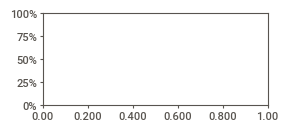

In [4]:
import sweetviz as sv
import pandas as pd
df = pd.read_csv("data/raw/life_style_data.csv")
report = sv.analyze(df)
report.show_html("analysis_outputs/sweetviz_report.html")

## Read the data file through pandas

In [2]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np

def random_sample(data, sample_size=5, random_state=None, replace=False):
   
    if isinstance(data, (pd.DataFrame, pd.Series)):
        return data.sample(n=sample_size if isinstance(sample_size, int) else None,
                           frac=sample_size if isinstance(sample_size, float) else None,
                           random_state=random_state,
                           replace=replace)
    
    elif isinstance(data, np.ndarray):
        if isinstance(sample_size, float):
            sample_size = int(len(data) * sample_size)
        np.random.seed(random_state)
        indices = np.random.choice(len(data), size=sample_size, replace=replace)
        return data[indices]
    
    else:
        raise TypeError("Data must be a pandas DataFrame, Series, or numpy array.")




ImportError: Numba needs NumPy 1.26 or less

In [ ]:
df = pd.read_csv("data/raw/life_style_data.csv")
sample_df = random_sample(df, sample_size=0.05, random_state=10)

profile = ProfileReport(sample_df, title="Lifestyle Data Full Profile Sample", explorative=True)
profile.to_file("analysis_outputs/lifestyle_full_profile_sample.html")

In [6]:
import pandas as pd

# Basic read
df = pd.read_csv("data/raw/life_style_data.csv")

# View first few rows
#print(df.head())


In [5]:
# # in notebook cell:
# import sys
# !{sys.executable} -m pip install --upgrade ydata-sdk


In [6]:
# One-cell diagnostic + safe ydata-profiling run with timeout fallback
import sys, os, time, traceback, multiprocessing
from pathlib import Path

# --------- Config ----------
CSV_PATH = "data/raw/life_style_data.csv"   # change if needed
OUT_HTML = "reports/profile_safe.html"
SAMPLE_N = 20000            # sample size to profile (reduce if memory small)
TIMEOUT_SECONDS = 300       # kill profiling child after this many seconds
# --------------------------

def print_env_info():
    import platform, psutil
    print("Python:", sys.version.splitlines()[0])
    try:
        import numpy as np, pandas as pd
        print("numpy:", np.__version__, "pandas:", pd.__version__)
    except Exception as e:
        print("Failed to import numpy/pandas:", e)
    try:
        import ydata_profiling
        print("ydata_profiling:", getattr(ydata_profiling, "__version__", "unknown"))
    except Exception as e:
        print("ydata_profiling import failed:", e)
    try:
        import ydata_sdk
        print("ydata_sdk:", getattr(ydata_sdk, "__version__", "unknown"))
    except Exception as e:
        print("ydata_sdk not available:", e)
    # system resources
    try:
        vm = psutil.virtual_memory()
        print(f"Total RAM: {vm.total/1024**3:.2f} GB, Available: {vm.available/1024**3:.2f} GB")
        print("CPU cores (logical):", psutil.cpu_count(logical=True))
    except Exception:
        print("psutil not installed; skipping resource check (pip install psutil to enable).")
    print("CWD:", os.getcwd())
    print("Notebook sys.executable:", sys.executable)

def profiling_job(csv_path, out_html, sample_n):
    # run inside child process to avoid kernel hanging
    try:
        import pandas as pd
        from ydata_profiling import ProfileReport
        print("Reading CSV (in child)...", csv_path)
        df = pd.read_csv(csv_path, low_memory=False)
        print("Original rows:", len(df), "cols:", len(df.columns))
        if len(df) > sample_n:
            print(f"Sampling {sample_n} rows for profiling...")
            df = df.sample(n=sample_n, random_state=42)
        # Create minimal profile with heavy modules OFF
        profile = ProfileReport(
            df,
            title="Safe Profile",
            explorative=False,
            minimal=True,
            correlations={
                "pearson": {"calculate": False},
                "spearman": {"calculate": False},
                "kendall": {"calculate": False},
                "phi_k": {"calculate": False},
                "cramers": {"calculate": False},
            },
            interactions=None,
            missing_diagrams=None,
            duplicates=None
        )
        Path(os.path.dirname(out_html) or ".").mkdir(parents=True, exist_ok=True)
        profile.to_file(out_html)
        print("Profile saved to:", out_html)
    except Exception as e:
        print("Exception inside profiling_job:", type(e).__name__, e)
        traceback.print_exc()

if __name__ == "__main__":
    print_env_info()
    # quick sanity read (no heavy compute)
    try:
        import pandas as pd
        head = pd.read_csv(CSV_PATH, nrows=5)
        print("Preview read OK, columns:", list(head.columns)[:10])
    except Exception as e:
        print("Cannot read CSV preview:", e)
        traceback.print_exc()

    print("\nStarting profiling in a separate process (timeout in seconds):", TIMEOUT_SECONDS)
    proc = multiprocessing.Process(target=profiling_job, args=(CSV_PATH, OUT_HTML, SAMPLE_N))
    proc.start()
    proc.join(TIMEOUT_SECONDS)
    if proc.is_alive():
        print(f"Profiling exceeded {TIMEOUT_SECONDS} seconds — terminating child process.")
        proc.terminate()
        proc.join()
        print("Child terminated. No report generated (or partial).")
    else:
        print("Child finished. Check for output file:", OUT_HTML)
    print("Done. If report not produced, paste the output above here so I can inspect.")


Python: 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]
numpy: 1.26.4 pandas: 2.1.4
ydata_profiling: v4.17.0
ydata_sdk not available: No module named 'ydata_sdk'
Total RAM: 15.65 GB, Available: 4.69 GB
CPU cores (logical): 16
CWD: D:\Python Workspace\New_project\General
Notebook sys.executable: d:\Miniconda_installation\envs\prof-py311-conda-env\python.exe
Preview read OK, columns: ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type']

Starting profiling in a separate process (timeout in seconds): 300
Child finished. Check for output file: reports/profile_safe.html
Done. If report not produced, paste the output above here so I can inspect.


In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd

df = pd.read_csv("data/raw/life_style_data.csv", low_memory=False)

# Option: try 50k sample (if available RAM > 8GB)
sample = df.sample(n=min(len(df), 50000), random_state=42)

profile = ProfileReport(
    sample,
    title="Bigger Profile (50k)",
    explorative=True,     # enables more analyses
    minimal=False,
    correlations={"pearson":{"calculate":False}, "spearman":{"calculate":False}},  # disable heavy ones if needed
)
profile.to_file("reports/profile_50k.html")
print("Saved reports/profile_50k.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
# # ydata-profiling (recommended)
# pip install pandas ydata-profiling
# # Sweetviz (alternative)
# pip install pandas sweetviz
# # Optional: for Jupyter inline display of HTML
# pip install ipywidgets

In [ ]:
#This need python 3.11 version
from ydata_profiling import ProfileReport

profile = ProfileReport(
    df,
    title="Data Profiling Report",
    explorative=True,        # enables advanced analysis
    minimal=False,           # set True for huge datasets to be faster
)

# Save to disk as HTML
output_path = "data/interim/profile_report.html"
profile.to_file(output_path)
print("Saved report to", output_path)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [2]:
pip install "numpy==1.25.3"

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.26.0 Requires-Python >=3.9,<3.13; 1.26.1 Requires-Python >=3.9,<3.13
ERROR: Could not find a version that satisfies the requirement numpy==1.25.3 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22

                                             |          | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

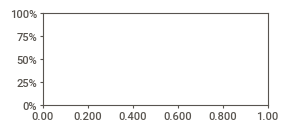

In [4]:
import pandas as pd
import sweetviz as sv
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pkg_resources")

df = pd.read_csv("data/raw/life_style_data.csv", low_memory=False)

# Option: sample if dataset is large
sample = df.sample(n=min(len(df), 50000), random_state=42)

report = sv.analyze(sample)
report.show_html("reports/sweetviz_report.html")  # creates HTML
print("Saved: reports/sweetviz_report.html")